**ASSIGNMENT 2**

D/ENG/21/0152/EE - 
K.H.M. Nilhara

GitHub Link - https://github.com/m-a-n-d-i/Assignment-2

QUESTION 1

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread('IMAGES/contact_lens.tif', cv.IMREAD_ANYCOLOR)
assert im is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
fx = cv.filter2D(im.astype('float'), -1, sobel_v)
fx = cv.normalize(fx.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

sobel_h= np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
fy = cv.filter2D(im.astype('float'), -1, sobel_h)
fy = cv.normalize(fy.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

abs_fx = np.abs(sobel_v)
abs_fx  = np.abs(sobel_h)

# Add the absolute values of the Sobel gradients pixel-wise to obtain the gradient magnitude
gradient_mag = cv.addWeighted(abs_fx , 0.5, abs_fx , 0.5, 0)

fig, ax = plt.subplots(1,4, figsize=(10,24))
ax[0].imshow(im, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(fx, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title('Verticle Gradient')
ax[2].imshow(fy, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title('Horizontal Gradient')
ax[3].imshow(gradient_mag, cmap = 'gray', vmin=0, vmax=255)
ax[3].set_title('Gradient Magnitude')
plt.show()



AssertionError: 

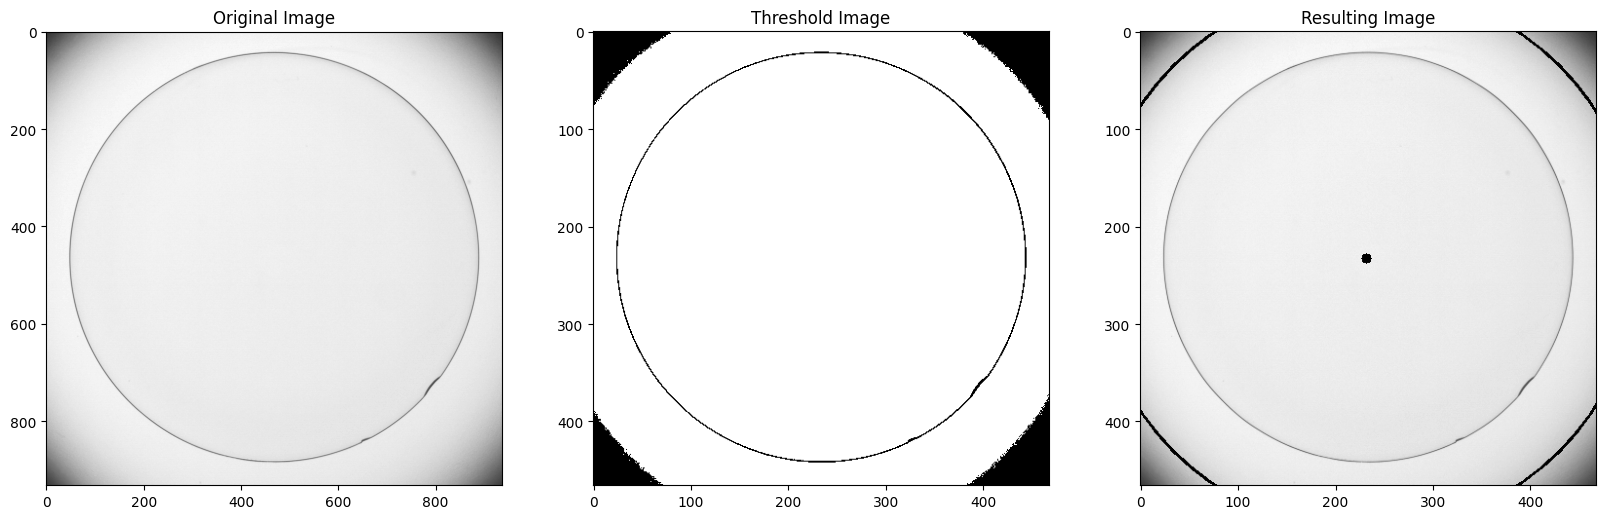

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('IMAGES/contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Apply a threshold to the image
thresh = cv.threshold(img, 200, 255, cv.THRESH_BINARY)[1]

# Find contours in the thresholded image
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Identify the contour that corresponds to the contact lens
contour_lens = None
for contour in contours:
    area = cv.contourArea(contour)
    perimeter = cv.arcLength(contour, True)

    if perimeter != 0.0:
        circularity = 4 * np.pi * area / (perimeter ** 2)
    else: 
        circularity = 0
   
    if circularity > 0.7 and area > 1000:
        contour_lens = contour
        break

# Compute the center of the contour
M = cv.moments(contour_lens)

if M["m00"] != 0.0:
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))


# Compute the diameter of the contour
(x, y), radius = cv.minEnclosingCircle(contour_lens)
diameter = int(radius * 2)

# Draw the center and diameter on the image
cv.circle(img, center, 5, (0, 255, 0), -1)
cv.circle(img, center, int(radius), (0, 0, 255), 2)

# Display the result
fig, ax = plt.subplots(1,3, figsize=(20,48))
ax[0].imshow(im, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(thresh, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title('Threshold Image')
ax[2].imshow(img, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title('Resulting Image')
plt.show()


QUESTION 2

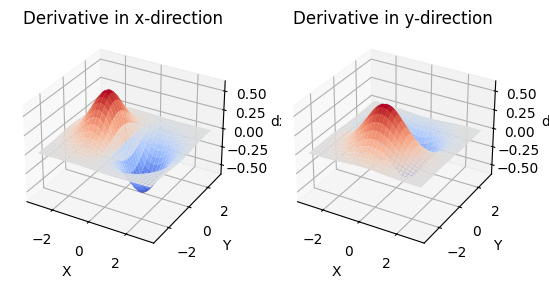

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Define sigma value and domain
sigma = 1
x = np.linspace(-3, 3, 61)
y = np.linspace(-3, 3, 61)
X, Y = np.meshgrid(x, y)

# Compute derivative of Gaussian kernel in x-direction
dx = np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2)) * (-X / sigma ** 2)
dy = np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2)) * (-Y / sigma ** 2)

# Create 3D plot of the derivative of Gaussian kernel in x-direction
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, dx, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dx')
ax.set_title('Derivative in x-direction')

# Create 3D plot of the derivative of Gaussian kernel in y-direction
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, dy, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dy')
ax.set_title('Derivative in y-direction')
plt.show()



QUESTION 3

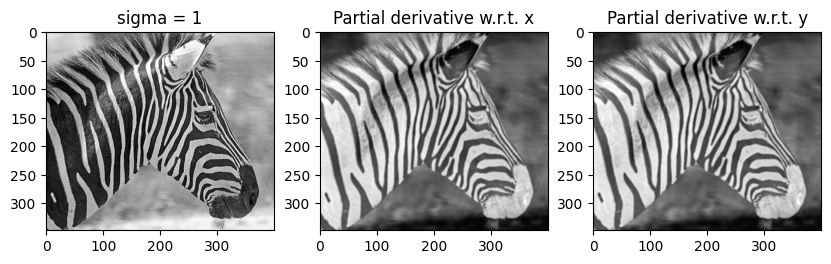

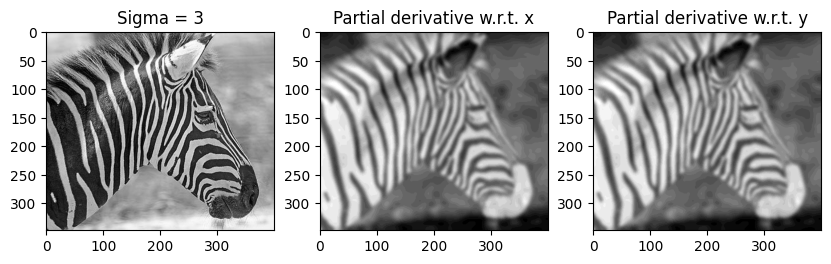

In [ ]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv.imread('IMAGES/zebrahead.jpg', cv.IMREAD_GRAYSCALE)

sigma = 1
#Gaussian kernel and its derivatives
kernel = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        kernel[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
dKdx = ndimage.convolve(img, -kernel/sigma**2)
dKdy = ndimage.convolve(img, -kernel.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('sigma = 1')
axs[1].imshow(dKdx, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(dKdy, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

sigma = 3

#Gaussian kernel and its derivatives
kernel = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        kernel[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
dKdx = ndimage.convolve(img, -kernel/sigma**2)
dKdy = ndimage.convolve(img, -kernel.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Sigma = 3')
axs[1].imshow(dKdx, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(dKdy, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()


QUESTION 4

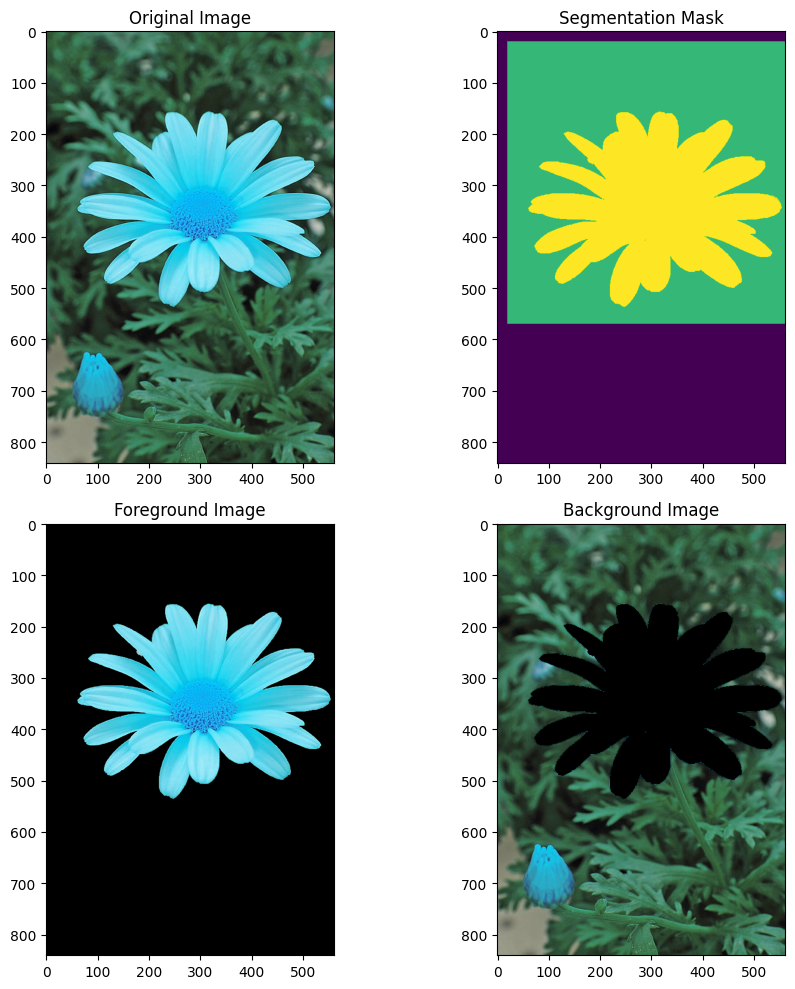

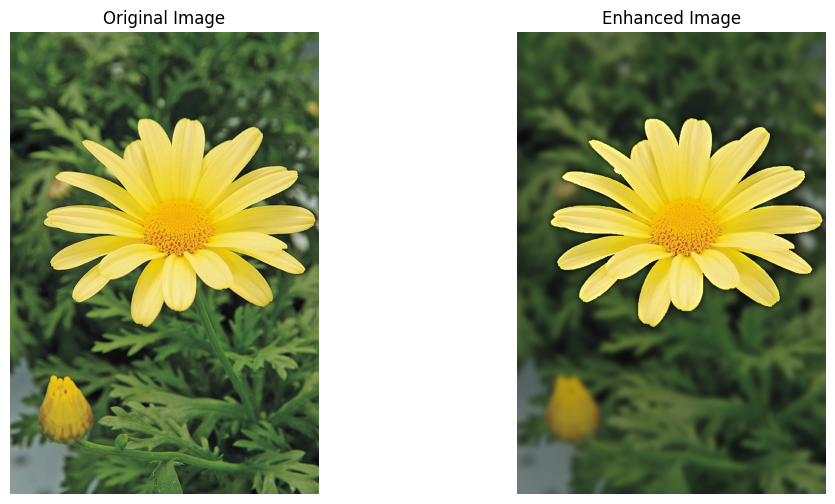

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('IMAGES/daisy.jpg')

#creating a mask 
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

#Rectangular enclosure
rect = (20, 20, 550, 550)

# Run the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)

# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

#foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Plotting the images
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img), plt.title('Original Image')
plt.subplot(222), plt.imshow(mask), plt.title('Segmentation Mask')
plt.subplot(223), plt.imshow(foreground), plt.title('Foreground Image')
plt.subplot(224), plt.imshow(background), plt.title('Background Image')
plt.tight_layout()
plt.show()

# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)

# Combine the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Display the original image and the enhanced image side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1), plt.imshow(img[:,:,::-1]), plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2), plt.imshow(enhanced_img[:,:,::-1]), plt.title('Enhanced Image')
plt.axis('off')
plt.show()
